# Random Hypergraph

In [8]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")

In [9]:
results_dir = "../results/"
out_dir  = f"{results_dir}synthetic/"

In [10]:
def pad_arr_list(arr_list):
    max_shape = max([a.shape[0] for a in arr_list])

    # Pad the shorter arrays with zeros
    padded_arr_list = [np.pad(a, (0, max_shape-a.shape[0]), mode='constant', constant_values=None) for a in arr_list]
    return padded_arr_list

## Random hypergraph

In [5]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4]) # wiring probas
density_scales = [1, 10, 50, 100]

rescale = True

Hs = []
for density in tqdm(density_scales):
    print(density * ps)
    H = xgi.random_hypergraph(N, density * ps)
    print(H)
    Hs.append(H)

orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
weights = np.ones(len(orders))

  0%|                                                     | 0/4 [00:00<?, ?it/s]

[1.e-02 1.e-04 1.e-06 1.e-08]


 25%|███████████▎                                 | 1/4 [00:03<00:09,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 82 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 50%|██████████████████████▌                      | 2/4 [00:06<00:06,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 710 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 75%|█████████████████████████████████▊           | 3/4 [00:09<00:03,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3599 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


100%|█████████████████████████████████████████████| 4/4 [00:12<00:00,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 7011 hyperedges


In [6]:
[find_charact_tau(H0, orders, weights, rescale_per_node=rescale) for H0 in Hs]

[0.030811432215571876,
 0.07891823373563545,
 0.16295223485461632,
 0.16780267235183294]

In [7]:
info_losses = []
complexities = []
orders_arr = []
message_lengths = []

for H0 in tqdm(Hs):
    
    orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
    tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
    Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
    
    info_losses.append(Ds_H)
    complexities.append(lZs_H)
    orders_arr.append(orders)
    message_lengths.append(Ds_H + lZs_H)

labels = [f"{i}" for i in sparsity_scales]

  0%|                                                     | 0/4 [00:00<?, ?it/s]


TypeError: 'NoneType' object is not subscriptable

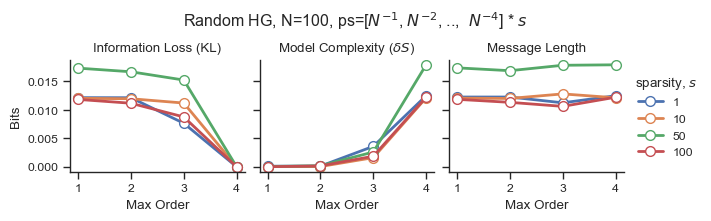

In [102]:
fig, axs = plot_3panels(info_losses, complexities, orders_arr, labels, legend_title="sparsity, $s$")

fig.suptitle(rf"Random HG, N={N}, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * $s$")

fig_name = f"message_length_RHG_N{N}_pwiring_{sparsity_scales}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

### repeated realizations

In [14]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4]) # wiring probas
density_scales = [1, 10, 50, 100]

n_rep = 3

rescale = True

Hs = dict()
for density in tqdm(density_scales):
    Hs_i = []
    for i in range(n_rep):
        print(density * ps)
        H = xgi.random_hypergraph(N, density * ps)
        print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[1][0])) - 1
weights = np.ones(len(orders))

  0%|                                                     | 0/4 [00:00<?, ?it/s]

[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 73 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 70 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]


 25%|███████████▎                                 | 1/4 [00:09<00:27,  9.23s/it]

Unnamed Hypergraph with 100 nodes and 65 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 690 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 704 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 50%|██████████████████████▌                      | 2/4 [00:18<00:18,  9.21s/it]

Unnamed Hypergraph with 100 nodes and 714 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3563 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3476 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 75%|█████████████████████████████████▊           | 3/4 [00:27<00:09,  9.18s/it]

Unnamed Hypergraph with 100 nodes and 3479 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7016 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7007 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


100%|█████████████████████████████████████████████| 4/4 [00:36<00:00,  9.20s/it]

Unnamed Hypergraph with 100 nodes and 7126 hyperedges


In [15]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for sparsity, Hs_i in tqdm(Hs.items()):
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for H0 in Hs_i:
        
        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        inverse_rescaling_factors = [d_max / d for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)
        Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
    
        info_losses_i.append(Ds_H)
        complexities_i.append(lZs_H)
        orders_arr_i.append(orders)
        message_lengths_i.append(Ds_H + lZs_H)
                  
    info_losses[sparsity] = info_losses_i
    complexities[sparsity] = complexities_i
    orders_arr[sparsity] = orders_arr_i
    message_lengths[sparsity] = message_lengths_i                          

labels = [f"{i}" for i in sparsity_scales]

  0%|                                                     | 0/4 [00:00<?, ?it/s]


TypeError: 'NoneType' object is not subscriptable

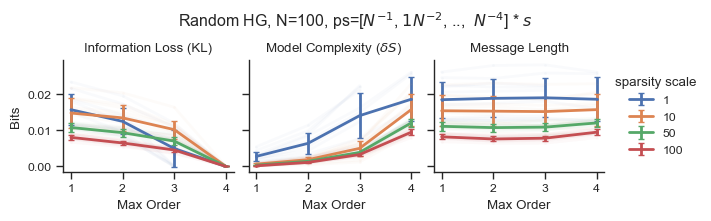

In [233]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)

n_s = len(info_losses)
alpha = 0.03

params = {"mfc": "white", "ms": 1, "lw": 2, "ls": "-", "marker":"o", "alpha": alpha}
params_err = {"mfc": "white", "ms": 1, "lw": 2, "ls": "-", "marker":"o", "zorder": 2, "capsize": 2}

for i, s in enumerate(sparsity_scales):
    for j in range(n_rep):
        ax1.plot(orders_arr[s][j], info_losses[s][j], c=f"C{i}", **params)
    info_loss_avg = np.nanmean(pad_arr_list(info_losses[s]), axis=0)
    info_loss_std = np.nanstd(pad_arr_list(info_losses[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax1.errorbar(orders_i, info_loss_avg, yerr=info_loss_std, label=labels[i], c=f"C{i}", **params_err)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

for i, s in enumerate(sparsity_scales):
    for j in range(n_rep):
        ax2.plot(orders_arr[s][j], complexities[s][j], c=f"C{i}", **params)         
    complexities_avg = np.nanmean(pad_arr_list(complexities[s]), axis=0)
    complexities_std = np.nanstd(pad_arr_list(complexities[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax2.errorbar(orders_i, complexities_avg, yerr=complexities_std, label=labels[i], c=f"C{i}", **params_err)

    
ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

for i, s in enumerate(sparsity_scales):
    for j in range(n_rep):
        #message_length = complexities[i] + info_losses[i]
        ax3.plot(orders_arr[s][j], message_lengths[s][j], c=f"C{i}", **params) 
    message_lengths_avg = np.nanmean(pad_arr_list(message_lengths[s]), axis=0)
    message_lengths_std = np.nanstd(pad_arr_list(message_lengths[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax3.errorbar(orders_i, message_lengths_avg, yerr=message_lengths_std, label=labels[i], c=f"C{i}", **params_err)


ax3.legend(title="sparsity scale", bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(rf"Random HG, N={N}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * $s$")

fig_name = f"message_length_RHG_N{N}_pwiring_{sparsity_scales}_nreps_{n_rep}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

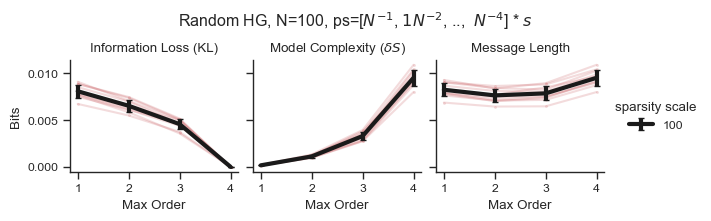

In [234]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)

n_s = len(info_losses)
alpha = 0.2

params = {"mfc": "white", "ms": 1, "lw": 1.5, "ls": "-", "marker":"o", "alpha": alpha}
params_err = {"mfc": "white", "ms": 1, "lw": 3, "ls": "-", "marker":"o", "zorder": 2, "capsize": 2}

ss = 100

for i, s in enumerate(sparsity_scales):
    if s != ss:
        continue
    for j in range(n_rep):
        ax1.plot(orders_arr[s][j], info_losses[s][j], c=f"C{i}", **params)
    info_loss_avg = np.nanmean(pad_arr_list(info_losses[s]), axis=0)
    info_loss_std = np.nanstd(pad_arr_list(info_losses[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax1.errorbar(orders_i, info_loss_avg, yerr=info_loss_std, label=labels[i], c=f"k", **params_err)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

for i, s in enumerate(sparsity_scales):
    if s != ss:
        continue
    for j in range(n_rep):
        ax2.plot(orders_arr[s][j], complexities[s][j], c=f"C{i}", **params)         
    complexities_avg = np.nanmean(pad_arr_list(complexities[s]), axis=0)
    complexities_std = np.nanstd(pad_arr_list(complexities[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax2.errorbar(orders_i, complexities_avg, yerr=complexities_std, label=labels[i], c=f"k", **params_err)

    
ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

for i, s in enumerate(sparsity_scales):
    if s != ss:
        continue
    for j in range(n_rep):
        #message_length = complexities[i] + info_losses[i]
        ax3.plot(orders_arr[s][j], message_lengths[s][j], c=f"C{i}", **params) 
    message_lengths_avg = np.nanmean(pad_arr_list(message_lengths[s]), axis=0)
    message_lengths_std = np.nanstd(pad_arr_list(message_lengths[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax3.errorbar(orders_i, message_lengths_avg, yerr=message_lengths_std, label=labels[i], c=f"k", **params_err)


ax3.legend(title="sparsity scale", bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(rf"Random HG, N={N}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * $s$")

fig_name = f"message_length_RHG_N{N}_pwiring_{ss}_nreps_{n_rep}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [235]:
for i, s in enumerate(sparsity_scales):
    message_lengths[s] = pad_arr_list(message_lengths[s])

In [236]:
df = pd.DataFrame.from_dict(message_lengths, orient="index").stack().to_frame()
df

0
1   0  [0.013011517511260291, 0.012777528052777275, 0...
    1  [0.013442266293297818, 0.013928695008638158, 0...
    2  [0.012767066796628875, 0.012862418231170247, 0...
    3  [0.020610765495421984, 0.020911775003143965, 0...
    4  [0.02622747684631605, 0.028057503972570796, 0....
    5  [0.013010057037214862, 0.013444604058024442, 0...
    6  [0.017084270952337697, 0.01751583731803837, 0....
    7  [0.022565553822142422, 0.02209530021037923, 0....
    8  [0.022073742548472816, 0.023145109082883197, 0...
    9  [0.024692723871862565, 0.024445337234496368, 0...
10  0  [0.01166920493741136, 0.011711369797931047, 0....
    1  [0.019793669398710217, 0.019432304851945754, 0...
    2  [0.009007424058641769, 0.00933292678355848, 0....
    3  [0.015058625632000187, 0.014414189614440378, 0...
    4  [0.019736010814377255, 0.018850143495907218, 0...
    5  [0.010835062623468509, 0.01044328112192187, 0....
    6  [0.017242151251445417, 0.017354124134482563, 0...
    7  [0.01640917105625393, 0.016674644475129202, 0....
    8  [0.022716964887011182, 0.023164536827049734, 0...
    9  [0.012217832843490612, 0.01220677617783452, 0....
50  0  [0.010995799201137513, 0.010790267249334563, 0...
    1  [0.01169724541476954, 0.011120929064497236, 0....
    2  [0.011142502297345397, 0.010523056337689615, 0...
    3  [0.012477974486359407, 0.012406270760131358, 0...
    4  [0.01062285679163611, 0.010370434902363466, 0....
    5  [0.010400801588537352, 0.009797744594824367, 0...
    6  [0.008184221419490843, 0.008166662374771715, 0...
    7  [0.011927364805090795, 0.011326011157300753, 0...
    8  [0.012463710327673627, 0.011453293921203693, 0...
    9  [0.011528981046796463, 0.011871297009023056, 0...
100 0  [0.007807756785558985, 0.007004080430386146, 0...
    1  [0.007889697722841572, 0.00738787283033613, 0....
    2  [0.008658299091084502, 0.008098714375616337, 0...
    3  [0.007890101634230533, 0.007138998221199032, 0...
    4  [0.009272388377529445, 0.008362324850034332, 0...
    5  [0.00901519936506466, 0.008407034147344575, 0....
    6  [0.00901656299878055, 0.008626683344313532, 0....
    7  [0.006854763599265359, 0.006430768724600744, 0...
    8  [0.008217126867494387, 0.007703158656236546, 0...
    9  [0.007623011258550999, 0.007063916736382826, 0...

In [237]:
for i, d in enumerate(orders_i):
    df[d] = df[0].apply(lambda x: x[i])
    
df = df[orders_i]
df

1         2         3         4
1   0  0.013012  0.012778  0.012431       NaN
    1  0.013442  0.013929  0.013969       NaN
    2  0.012767  0.012862  0.013445  0.012619
    3  0.020611  0.020912  0.021132       NaN
    4  0.026227  0.028058  0.028251  0.026216
    5  0.013010  0.013445  0.013049  0.012670
    6  0.017084  0.017516  0.018141  0.016085
    7  0.022566  0.022095  0.021967       NaN
    8  0.022074  0.023145  0.022441       NaN
    9  0.024693  0.024445  0.025970  0.025755
10  0  0.011669  0.011711  0.012860  0.011651
    1  0.019794  0.019432  0.018611  0.020597
    2  0.009007  0.009333  0.008988  0.009094
    3  0.015059  0.014414  0.015720  0.015603
    4  0.019736  0.018850  0.018807  0.020169
    5  0.010835  0.010443  0.010596  0.010479
    6  0.017242  0.017354  0.016963  0.017451
    7  0.016409  0.016675  0.015700  0.017020
    8  0.022717  0.023165  0.022811  0.022999
    9  0.012218  0.012207  0.011318  0.012791
50  0  0.010996  0.010790  0.011409  0.012048
    1  0.011697  0.011121  0.011486  0.012628
    2  0.011143  0.010523  0.010474  0.011936
    3  0.012478  0.012406  0.012683  0.013406
    4  0.010623  0.010370  0.010070  0.011473
    5  0.010401  0.009798  0.010102  0.011572
    6  0.008184  0.008167  0.008562  0.009256
    7  0.011927  0.011326  0.011320  0.012794
    8  0.012464  0.011453  0.011657  0.013172
    9  0.011529  0.011871  0.011344  0.012533
100 0  0.007808  0.007004  0.007359  0.009226
    1  0.007890  0.007388  0.007557  0.009045
    2  0.008658  0.008099  0.008011  0.009872
    3  0.007890  0.007139  0.007447  0.009012
    4  0.009272  0.008362  0.008927  0.010887
    5  0.009015  0.008407  0.008240  0.010254
    6  0.009017  0.008627  0.008789  0.010393
    7  0.006855  0.006431  0.006457  0.007980
    8  0.008217  0.007703  0.008481  0.009642
    9  0.007623  0.007064  0.007143  0.008723

In [238]:
dff = df.reset_index(names=["sparsity", "rep"]).melt(
    id_vars=["sparsity", "rep"],
    value_vars=orders_i,
    var_name="order",
    value_name="message_length",
)

/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  vals = y if x is None else x


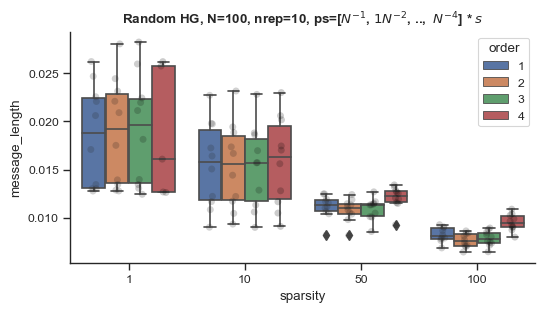

In [255]:
from statannotations.Annotator import Annotator

fix, ax = plt.subplots(figsize=(6, 3))

#palette = sb.color_palette("Set1", n_colors=4)

#box_params = {
#    'boxprops':{'facecolor':'none'},
#    'medianprops':{'color':'silver'},
    #'whiskerprops':{'color':'blue'},
    #'capprops':{'color':'yellow'}
#}

sb.boxplot(data=dff, hue="order", y="message_length", x="sparsity", ax=ax)#, **box_params)

sb.stripplot(data=dff, hue="order", y="message_length", x="sparsity", ax=ax, color="black", dodge=True, alpha=0.2, legend=False)

sb.despine()
ax.set_title(rf"Random HG, N={N}, nrep={n_rep}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * $s$", weight="bold")


pairs = []
for s in sparsity_scales:
    pairs.append( [(s, 3), (s, 4) ] )
    pairs.append( [(s, 1), (s, 2) ] )
    pairs.append( [(s, 1), (s, 3) ] )
    pairs.append( [(s, 1), (s, 4) ] )
    pairs.append( [(s, 2), (s, 3) ] )
    pairs.append( [(s, 2), (s, 4) ] )

#annotator = Annotator(ax, pairs, data=dff, x="sparsity", y="message_length", hue="order")
#annotator.configure(test='t-test_welch', text_format='star', loc='inside')
#annotator.apply_and_annotate()

fig_name = f"message_length_RHG_N{N}_pwiring_{sparsity_scales}_nreps_{n_rep}_boxplot"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
